## Part 1: Explore the Data

Import the data and use Pandas to learn more about the dataset.

In [1]:
import pandas as pd

df_data = pd.read_csv('Resources/client_dataset.csv')
df_data.head()

,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,item_id,category,subcategory,unit_price,unit_cost,unit_weight,qty,line_number
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,17,2023,EUD29711-63-6U,decor,wall art,1096.80,762.71,7.50,105,1
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,20,2023,XDA18116-89-4A,consumables,pens,24.95,15.09,1.49,21,0
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,4,2023,ABE59463-05-7E,software,project management,13.52,7.86,1.68,39,6
3,Nathan,Baker,Accounting technician,827-788-8123x012,bakernathan@benson.com,46554,9031802,2023-04-25,17,2023,ZMM00836-65-0C,consumables,pens,36.42,24.85,1.23,29,3
4,Christina,Schwartz,Chiropractor,265-829-3643,christinaschwartz9252@mcconnell.com,92089,1322274,2023-05-28,21,2023,BZX55559-12-3X,consumables,misc,195.10,108.17,46.43,20,1


In [7]:
# View the column names in the data
df_data.columns



Index(['first', 'last', 'job', 'phone', 'email', 'client_id', 'order_id',
       'order_date', 'order_week', 'order_year', 'item_id', 'category',
       'subcategory', 'unit_price', 'unit_cost', 'unit_weight', 'qty',
       'line_number'],
      dtype='object')

In [8]:
# Use the describe function to gather some basic statistics
df_data.describe()


,client_id,order_id,order_week,order_year,unit_price,unit_cost,unit_weight,qty,line_number
count,54639.000000,5.463900e+04,54639.000000,54639.000000,54639.000000,54639.000000,54639.000000,5.463900e+04,54639.000000
mean,54837.869416,5.470190e+06,11.359139,2022.993064,136.267207,99.446073,5.004116,5.702646e+02,2.979667
std,25487.438231,2.599807e+06,7.023499,0.082997,183.873135,133.164267,5.326599,1.879552e+04,2.436320
min,10033.000000,1.000886e+06,1.000000,2022.000000,0.010000,0.010000,0.000000,0.000000e+00,0.000000
25%,33593.000000,3.196372e+06,6.000000,2023.000000,20.800000,14.840000,1.450000,3.200000e+01,1.000000
50%,53305.000000,5.496966e+06,11.000000,2023.000000,68.310000,49.890000,3.240000,6.800000e+01,3.000000
75%,78498.000000,7.733869e+06,17.000000,2023.000000,173.160000,125.570000,6.890000,1.700000e+02,5.000000
max,99984.000000,9.998480e+06,52.000000,2023.000000,1396.230000,846.270000,46.430000,3.958244e+06,9.000000


In [9]:
# Use this space to do any additional research
# and familiarize yourself with the data.
#df_data.index
#df_data.dtypes
#df_data.axes
#df_data.info
df_data.size 


983502

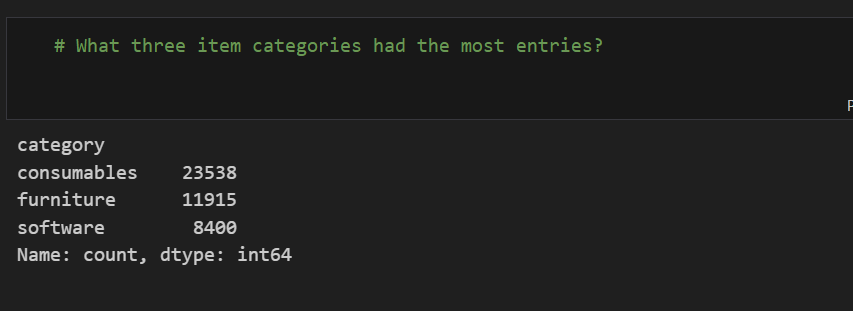

In [10]:
# What three item categories had the most entries?
#count in category
#return max, return max-1, return max -2 
top_cat_df = df_data.groupby('category')['qty'].count().sort_values(ascending=False)
#sort_values
#count = df_data.max
top_cat_df.head(3)


category
consumables    23538
furniture      11915
software        8400
Name: qty, dtype: int64

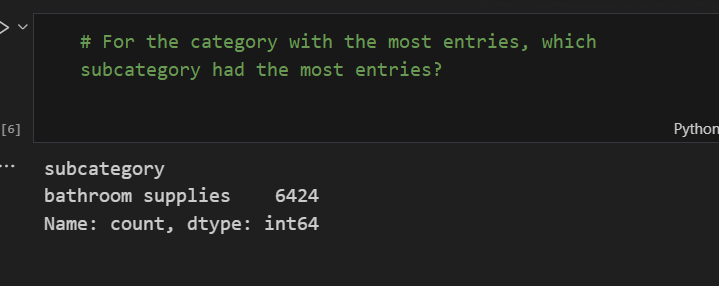

In [11]:
# For the category with the most entries, which subcategory had the most entries?
subcat_df = df_data.groupby('subcategory')['qty'].count().sort_values(ascending=False)
subcat_df.head(1)


subcategory
bathroom supplies    6424
Name: qty, dtype: int64

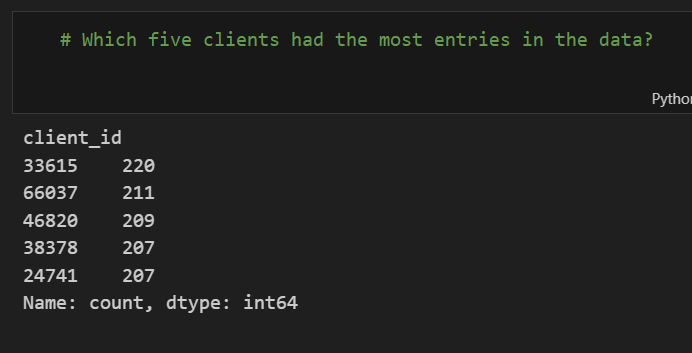

In [12]:
# Which five clients had the most entries in the data?
df_top_five = df_data.groupby('client_id')['qty'].count().sort_values(ascending=False)
df_top_five.head(5)


client_id
33615    220
66037    211
46820    209
38378    207
24741    207
Name: qty, dtype: int64

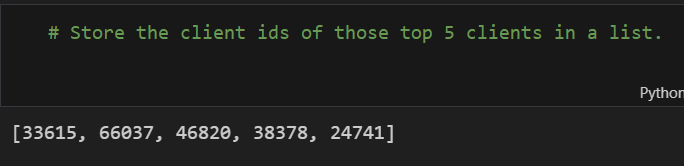

In [13]:
# Store the client ids of those top 5 clients in a list.
df_clients = df_top_five.head(5).index.tolist()
df_clients


[33615, 66037, 46820, 38378, 24741]

In [14]:
df_clients

[33615, 66037, 46820, 38378, 24741]

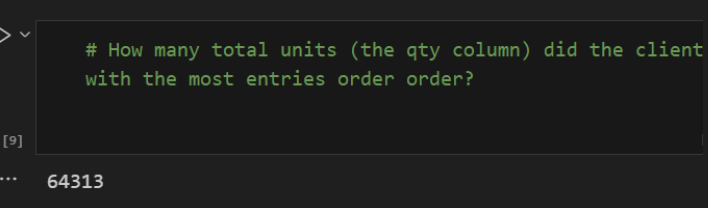

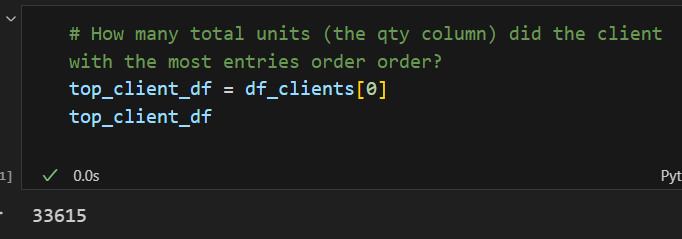

In [15]:
# How many total units (the qty column) did the client with the most entries order order?
top_client_df = df_clients[0]
top_client_df


33615

## Part 2: Transform the Data
Do we know that this client spent the more money than client 66037? If not, how would we find out? Transform the data using the steps below to prepare it for analysis.

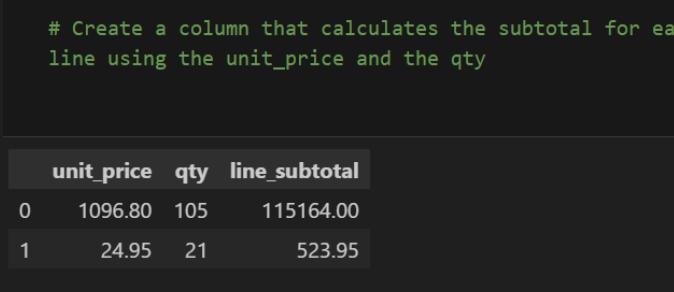

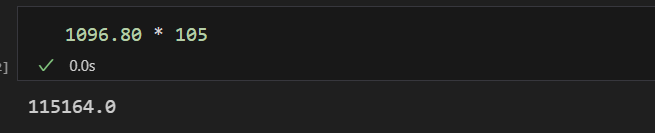

In [16]:
1096.80 * 105

115164.0

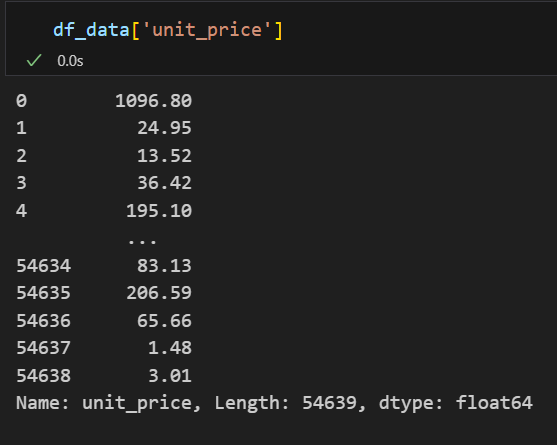

In [17]:
df_data['unit_price']

0        1096.80
1          24.95
2          13.52
3          36.42
4         195.10
          ...   
54634      83.13
54635     206.59
54636      65.66
54637       1.48
54638       3.01
Name: unit_price, Length: 54639, dtype: float64

In [18]:
df_data['qty']

0         105
1          21
2          39
3          29
4          20
         ... 
54634      33
54635      47
54636     475
54637     112
54638    1031
Name: qty, Length: 54639, dtype: int64

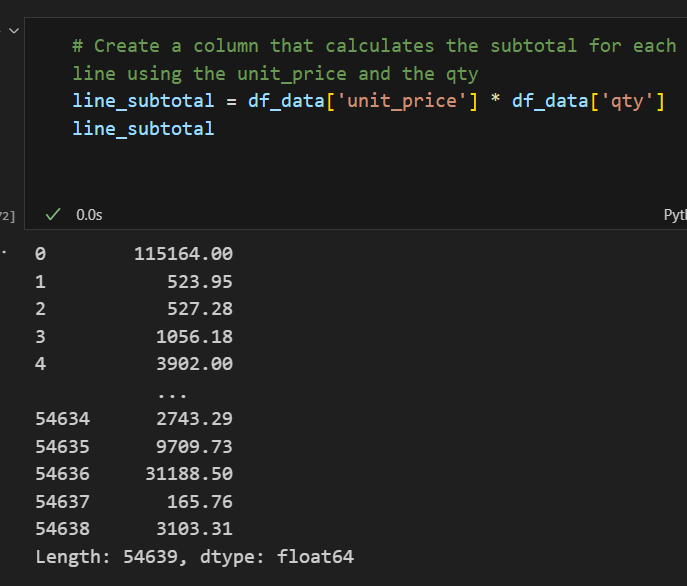

In [19]:
# Create a column that calculates the subtotal for each line using the unit_price and the qty
line_subtotal = df_data['unit_price'] * df_data['qty']
df_data['line_subtotal'] = line_subtotal
line_subtotal



0        115164.00
1           523.95
2           527.28
3          1056.18
4          3902.00
           ...    
54634      2743.29
54635      9709.73
54636     31188.50
54637       165.76
54638      3103.31
Length: 54639, dtype: float64

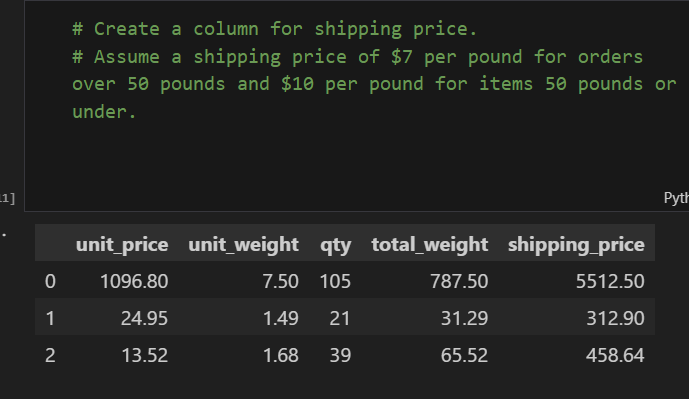

In [31]:
# Create a column for shipping price.
# Assume a shipping price of $7 per pound for orders over 50 pounds and $10 per pound for items 50 pounds or under.


df_data['ship_wt'] = df_data['unit_weight'] * df_data['qty']
# qty_wt

def ship_price_cal(value):
    #print(value)
    if value > 50.0:
        return value * 7
    else:
        return value * 10
    
df_data['ship_price'] = df_data['ship_wt'].apply(ship_price_cal)
df_data[['unit_price', 'unit_weight', 'qty', 'ship_wt', 'ship_price']]



#f_data.columns

,unit_price,unit_weight,qty,ship_wt,ship_price
0,1096.80,7.50,105,787.50,5512.50
1,24.95,1.49,21,31.29,312.90
2,13.52,1.68,39,65.52,458.64
3,36.42,1.23,29,35.67,356.70
4,195.10,46.43,20,928.60,6500.20
...,...,...,...,...,...
54634,83.13,2.25,33,74.25,519.75
54635,206.59,11.70,47,549.90,3849.30
54636,65.66,4.16,475,1976.00,13832.00
54637,1.48,18.04,112,2020.48,14143.36


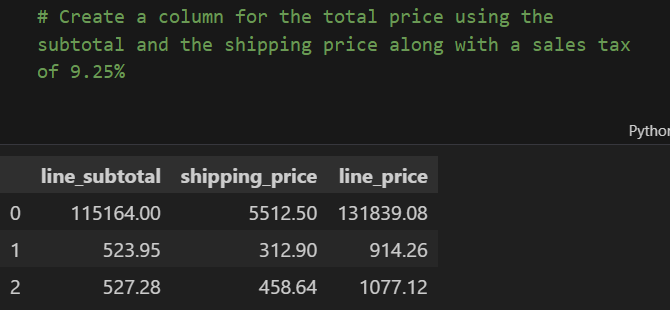

In [34]:
# Create a column for the total price using the subtotal and the shipping price along with a sales tax of 9.25%

df_data['line_price'] = ((df_data['ship_price'] + df_data['line_subtotal']) * 1.0925).round(2)
df_data[['line_subtotal', 'ship_price', 'line_price']]

,line_subtotal,ship_price,line_price
0,115164.00,5512.50,131839.08
1,523.95,312.90,914.26
2,527.28,458.64,1077.12
3,1056.18,356.70,1543.57
4,3902.00,6500.20,11364.40
...,...,...,...
54634,2743.29,519.75,3564.87
54635,9709.73,3849.30,14813.24
54636,31188.50,13832.00,49184.90
54637,165.76,14143.36,15632.71


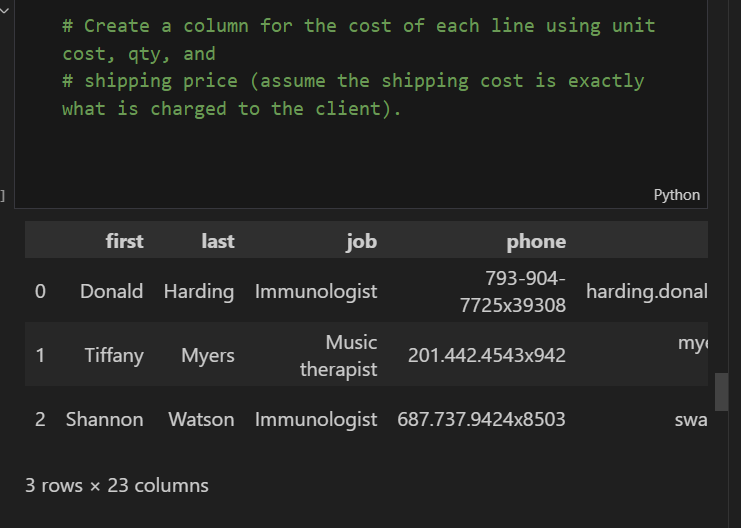

In [36]:
# Create a column for the cost of each line using unit cost, qty, and
# shipping price (assume the shipping cost is exactly what is charged to the client).

df_data['line_cost'] = df_data['ship_price'] + df_data['qty'] + df_data['unit_cost']
df_data.head(3)



,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,...,unit_cost,unit_weight,qty,line_number,line_subtotal,ship_wt,ship_price,total_price,line_price,line_cost
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,17,2023,...,762.71,7.50,105,1,115164.00,787.50,5512.50,123039.00,131839.08,6380.21
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,20,2023,...,15.09,1.49,21,0,523.95,31.29,312.90,742.98,914.26,348.99
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,4,2023,...,7.86,1.68,39,6,527.28,65.52,458.64,1182.48,1077.12,505.50


In [37]:
131839.08 - 85597.05

46242.029999999984

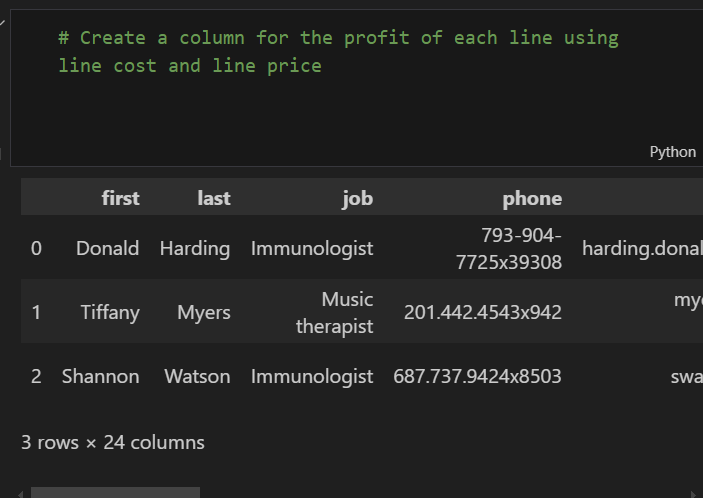

In [40]:
# Create a column for the profit of each line using line cost and line price
df_data['line_profit'] =  df_data['line_price'] - df_data['line_cost']
df_data.head(3)



,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,...,unit_weight,qty,line_number,line_subtotal,ship_wt,ship_price,total_price,line_price,line_cost,line_profit
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,17,2023,...,7.50,105,1,115164.00,787.50,5512.50,123039.00,131839.08,6380.21,125458.87
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,20,2023,...,1.49,21,0,523.95,31.29,312.90,742.98,914.26,348.99,565.27
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,4,2023,...,1.68,39,6,527.28,65.52,458.64,1182.48,1077.12,505.50,571.62


## Part 3: Confirm your work
You have email receipts showing that the total prices for 3 orders. Confirm that your calculations match the receipts. Remember, each order has multiple lines.

Order ID 2742071 had a total price of \$152,811.89

Order ID 2173913 had a total price of \$162,388.71

Order ID 6128929 had a total price of \$923,441.25


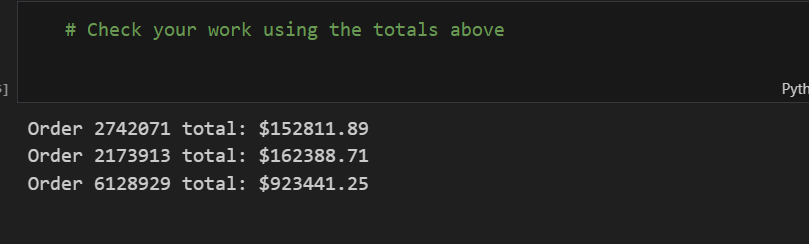

In [49]:
# Check your work using the totals above
#chain it together to get the answer - .head and subsets - can store as variable but last resort 
def order_sum_cal(value,):
    df_data.loc[df_data['order_id'] == value]
    summation = df_data['line_price'].sum(axis=0)
    return summation 
    
    

df_data['summation'] = df_data['line_price'].apply(order_sum_cal)
#df_data[df_data['order_id'] == 2742071]
#df_data[df_data['order_id'] == 2173913].apply(order_sum_cal)
#df_data[df_data['order_id'] == 6128929].apply(order_sum_cal)
df_data[df_data['order_id'] == 2742071]
df_data[df_data['order_id'] == 2173913]
df_data[df_data['order_id'] == 6128929]


,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,...,qty,line_number,line_subtotal,ship_wt,ship_price,total_price,line_price,line_cost,line_profit,summation
3422,Dorothy,Hall,"Journalist, broadcasting",001-338-609-8495x03504,dorothy.per.1343@mitchell-chambers.com,88257,6128929,2023-03-12,10,2023,...,671,3,8890.75,5106.31,35744.17,59953.85,48763.65,36426.92,12336.73,5.642667e+09
13672,Dorothy,Hall,"Journalist, broadcasting",001-338-609-8495x03504,dorothy.per.1343@mitchell-chambers.com,88257,6128929,2023-03-12,10,2023,...,40,6,5459.60,282.00,1974.00,8279.60,8121.21,2104.12,6017.09,5.642667e+09
14517,Dorothy,Hall,"Journalist, broadcasting",001-338-609-8495x03504,dorothy.per.1343@mitchell-chambers.com,88257,6128929,2023-03-12,10,2023,...,1089,9,117187.29,6838.92,47872.44,185576.49,180327.76,49059.79,131267.97,5.642667e+09
16295,Dorothy,Hall,"Journalist, broadcasting",001-338-609-8495x03504,dorothy.per.1343@mitchell-chambers.com,88257,6128929,2023-03-12,10,2023,...,44,8,3439.92,34.32,343.20,3680.16,4133.06,429.92,3703.14,5.642667e+09
21141,Dorothy,Hall,"Journalist, broadcasting",001-338-609-8495x03504,dorothy.per.1343@mitchell-chambers.com,88257,6128929,2023-03-12,10,2023,...,26,2,731.12,119.60,837.20,1927.12,1713.39,886.84,826.55,5.642667e+09
37265,Dorothy,Hall,"Journalist, broadcasting",001-338-609-8495x03504,dorothy.per.1343@mitchell-chambers.com,88257,6128929,2023-03-12,10,2023,...,45,1,73.35,270.00,1890.00,2773.35,2144.96,1936.14,208.82,5.642667e+09
37949,Dorothy,Hall,"Journalist, broadcasting",001-338-609-8495x03504,dorothy.per.1343@mitchell-chambers.com,88257,6128929,2023-03-12,10,2023,...,344,0,320470.40,2253.20,15772.40,343002.40,367345.26,16586.45,350758.81,5.642667e+09
38542,Dorothy,Hall,"Journalist, broadcasting",001-338-609-8495x03504,dorothy.per.1343@mitchell-chambers.com,88257,6128929,2023-03-12,10,2023,...,8,4,48.72,11.04,110.40,126.00,173.84,123.90,49.94,5.642667e+09
48834,Dorothy,Hall,"Journalist, broadcasting",001-338-609-8495x03504,dorothy.per.1343@mitchell-chambers.com,88257,6128929,2023-03-12,10,2023,...,664,5,90974.64,365.20,2556.40,94626.64,102182.66,3319.10,98863.56,5.642667e+09
49353,Dorothy,Hall,"Journalist, broadcasting",001-338-609-8495x03504,dorothy.per.1343@mitchell-chambers.com,88257,6128929,2023-03-12,10,2023,...,1663,7,141288.48,7084.38,49590.66,212132.28,208535.46,51326.20,157209.26,5.642667e+09


## Part 4: Summarize and Analyze
Use the new columns with confirmed values to find the following information.

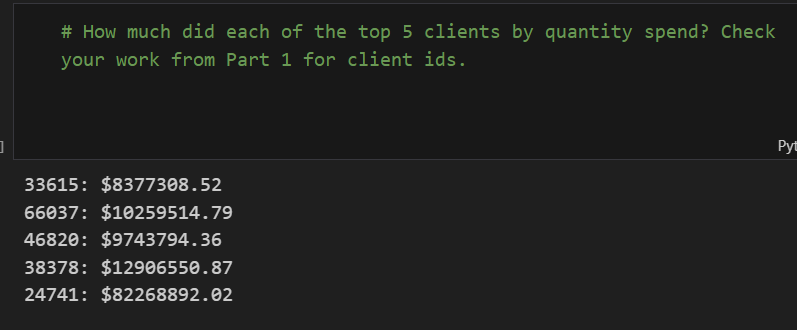

In [16]:
# How much did each of the top 5 clients by quantity spend? Check your work from Part 1 for client ids.



33615: $8377308.52
66037: $10259514.79
46820: $9743794.36
38378: $12906550.87
24741: $82268892.02


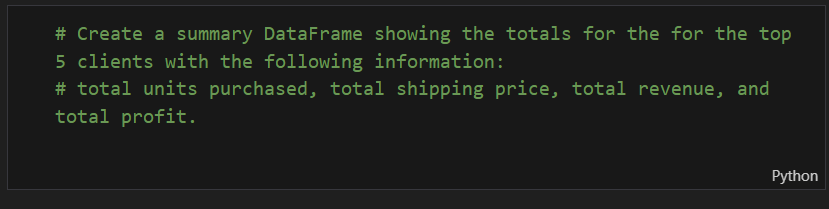

In [1]:
# Create a summary DataFrame showing the totals for the for the top 5 clients with the following information:
# total units purchased, total shipping price, total revenue, and total profit. 


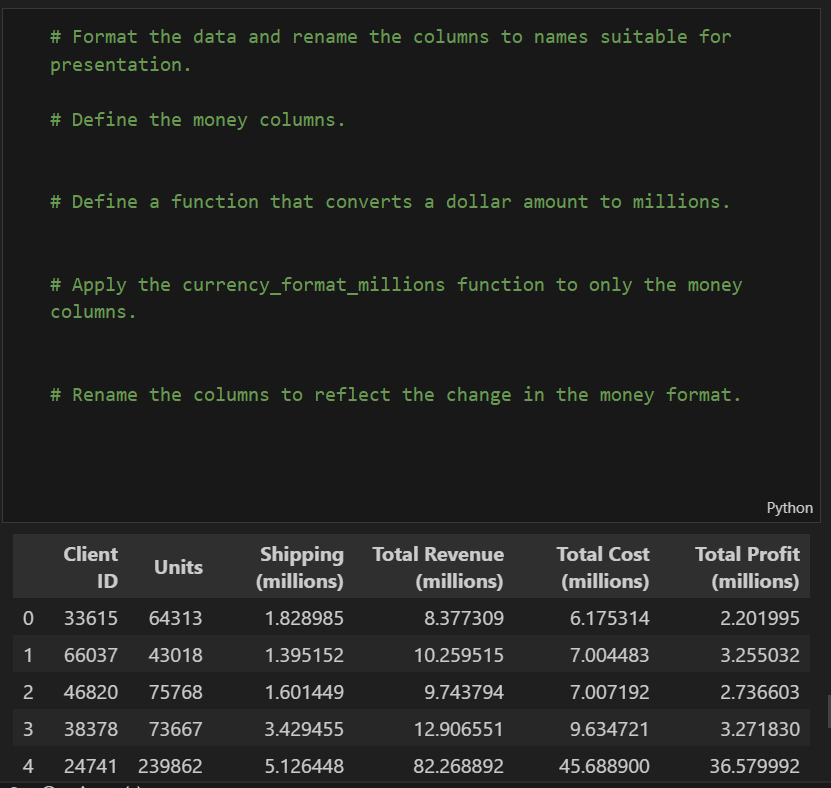

In [18]:
# Format the data and rename the columns to names suitable for presentation.

# Define the money columns. 


# Define a function that converts a dollar amount to millions.


# Apply the currency_format_millions function to only the money columns. 


# Rename the columns to reflect the change in the money format. 




,Client ID,Units,Shipping (millions),Total Revenue (millions),Total Cost (millions),Total Profit (millions)
0,33615,64313,1.828985,8.377309,6.175314,2.201995
1,66037,43018,1.395152,10.259515,7.004483,3.255032
2,46820,75768,1.601449,9.743794,7.007192,2.736603
3,38378,73667,3.429455,12.906551,9.634721,3.271830
4,24741,239862,5.126448,82.268892,45.688900,36.579992


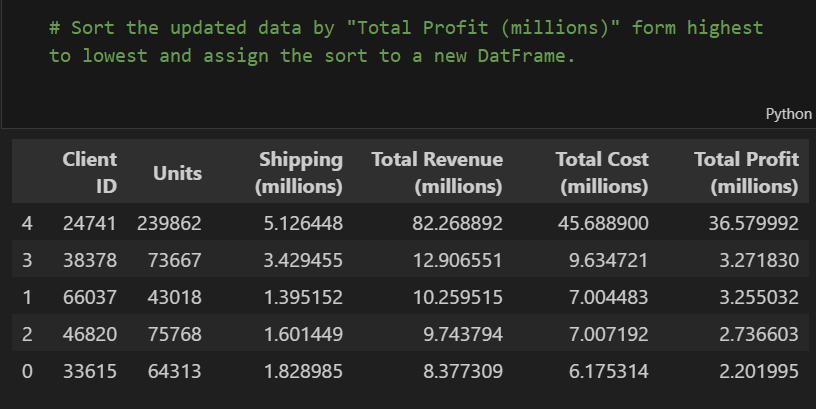

In [19]:
# Sort the updated data by "Total Profit (millions)" form highest to lowest and assign the sort to a new DatFrame.


,Client ID,Units,Shipping (millions),Total Revenue (millions),Total Cost (millions),Total Profit (millions)
4,24741,239862,5.126448,82.268892,45.688900,36.579992
3,38378,73667,3.429455,12.906551,9.634721,3.271830
1,66037,43018,1.395152,10.259515,7.004483,3.255032
2,46820,75768,1.601449,9.743794,7.007192,2.736603
0,33615,64313,1.828985,8.377309,6.175314,2.201995
